In [1]:
using Plots
using LazySets
using Random

In [2]:
function plot_points(S::Matrix{<:Real}, w::Vector{<:Integer}, Π::Vector{<:Integer}=[0])
    S = Float64.(S)
    red_points = S[w.==1, :]
    blue_points = S[w.==-1, :]

    plt = scatter(size=(500, 500), legend=:none, 
                  xlims=(minimum(S[:,1])-1, maximum(S[:,1])+1),
                  ylims=(minimum(S[:,2])-1, maximum(S[:,2])+1), 
                  axis=0, framestyle=:box,
                  grid=0, color=:white)
    
    scatter!(plt, red_points[:, 1], red_points[:, 2], color=:red)
    scatter!(plt, blue_points[:, 1], blue_points[:, 2], color=:blue)
    
    if Π != [0]
        k = maximum(Π)        
        for j = 1:k
            j_points = S[Π .== j,:]
            j_set = [j_points[i,:] for i in 1:size(j_points,1)]
            j_hull = convex_hull(j_set)
            plot!(VPolygon(j_hull), color=:gray, alpha=0.2)
        end
        SΠ_disc = [abs(sum((Π.==j) .* (w.==1)) - sum((Π.==j) .* (w.==-1))) for j=1:k]
        println("Discrepancy = ", minimum(SΠ_disc), " = min",SΠ_disc)
    end
    
    return plt
end

plot_points (generic function with 2 methods)

Discrepancy = 1 = min[1, 1, 2]


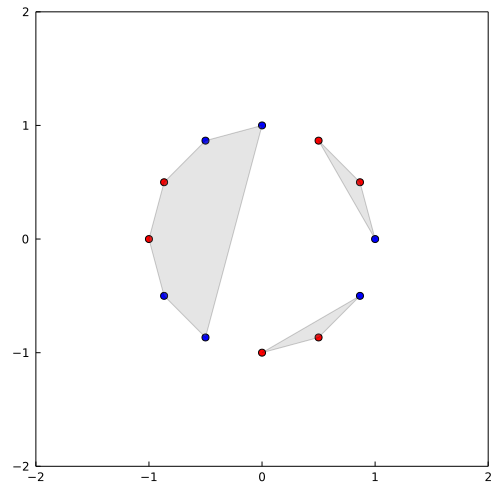

In [3]:
n = 12
S = zeros(12,2)
θ = 2π / n
for i = 1:n
    S[i,:] = [sin(θ*i), cos(θ*i)]
end
w = [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1]
Π = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3]
plot_points(S,w,Π)

Discrepancy = 1 = min[4, 1, 1]


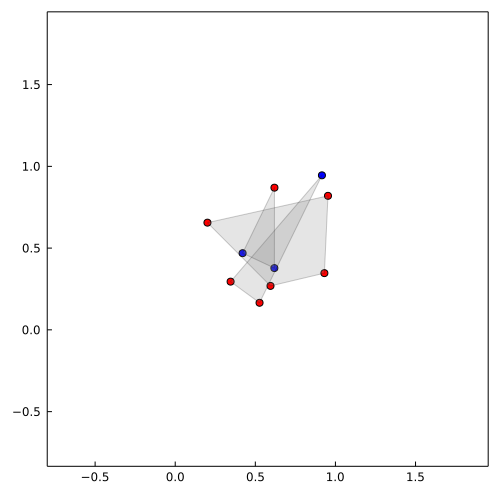

In [4]:
n = 10
S = rand(n,2)
w = rand([-1,1], n)
k = 3
Π = shuffle!(cat(collect(1:k), rand(1:k, n-k), dims=1)) # el collect es para tener al menos un pto por parte

# hasta aqui no hay chequeo de "convex partition" solo ploter y calculo discrepancia

plot_points(S,w,Π)